In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [68]:
df=pd.read_csv()

In [69]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
32,39373,Female,82.0,1,0,Yes,Self-employed,Urban,196.92,22.2,never smoked,1
3129,7577,Male,13.0,0,0,No,children,Urban,75.85,20.3,Unknown,0
422,55351,Male,63.0,0,0,Yes,Private,Urban,90.07,36.8,Unknown,0
4806,69723,Male,15.0,0,0,No,Private,Urban,137.27,19.3,never smoked,0
4268,63333,Female,32.0,0,0,Yes,Self-employed,Urban,110.33,24.0,smokes,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [71]:
df.shape

(5110, 12)

In [72]:
df.drop("id",axis=1,inplace=True)

In [73]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [74]:
df.duplicated().sum()

0

In [75]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [76]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [77]:
df.bmi.fillna(df.bmi.mean(),inplace=True)

In [78]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4636,Female,48.0,0,0,Yes,Self-employed,Urban,212.19,46.9,never smoked,0
2153,Female,54.0,0,0,Yes,Govt_job,Rural,102.61,32.4,Unknown,0
3331,Male,5.0,0,0,No,children,Urban,101.61,33.1,Unknown,0
2630,Female,0.8,0,0,No,children,Urban,106.59,15.5,Unknown,0
1600,Male,0.4,0,0,No,children,Urban,109.56,14.3,Unknown,0


In [79]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Figure size 2000x1500 with 0 Axes>

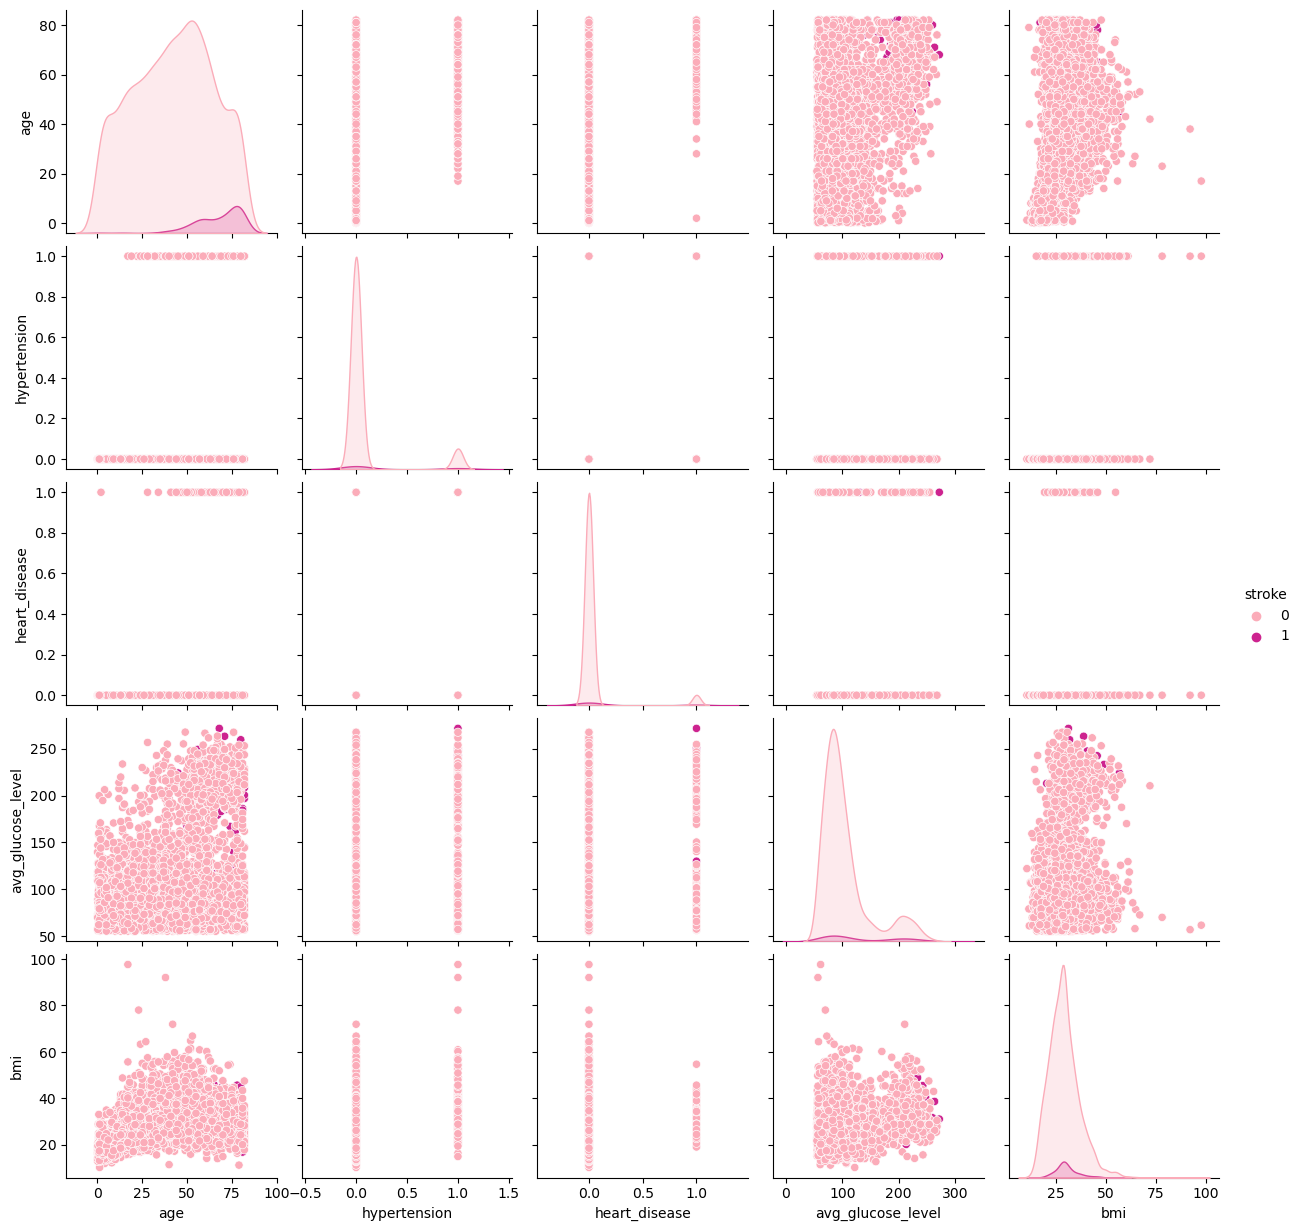

In [80]:
fig=pt.figure(figsize=(20,15),dpi=100)
sns.pairplot(df,hue="stroke",palette = "RdPu")

In [81]:
dfnumerical=df[['age','avg_glucose_level','bmi']]
dfcategorical=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status', 'stroke']]

In [82]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [83]:
pd.crosstab(df.gender,df.work_type)

work_type,Govt_job,Never_worked,Private,Self-employed,children
gender,,,,,
Female,399,11,1754,504,326
Male,258,11,1170,315,361
Other,0,0,1,0,0


ever_married,No,Yes
gender,,
Female,993,2001
Male,763,1352
Other,1,0


In [85]:
x=df.drop("stroke",axis=1)
y=df.stroke

In [86]:
x.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.200000,Unknown


In [87]:
y.tail()

5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, dtype: int64

In [88]:
l=LabelEncoder()
x=x.apply(LabelEncoder().fit_transform)

In [89]:
x.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5105,0,101,1,0,1,2,1,1360,162,2
5106,0,102,0,0,1,3,1,3030,274,2
5107,0,56,0,0,1,3,0,1314,180,2
5108,1,72,0,0,1,2,0,3363,129,1
5109,0,65,0,0,1,0,1,1454,135,0


In [90]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [91]:
x

array([[ 1.18807255,  1.03951283, -0.32860186, ...,  1.78017003,
         1.0601011 , -0.35178071],
       [-0.840344  ,  0.7795668 , -0.32860186, ...,  1.54302885,
         0.00597702,  0.58155233],
       [ 1.18807255,  1.60272924, -0.32860186, ...,  0.54287232,
         0.50601024,  0.58155233],
       ...,
       [-0.840344  , -0.34686602, -0.32860186, ..., -0.51521182,
         0.24923642,  0.58155233],
       [ 1.18807255,  0.34632341, -0.32860186, ...,  1.33937707,
        -0.43999855, -0.35178071],
       [-0.840344  ,  0.04305303, -0.32860186, ..., -0.38849515,
        -0.35891208, -1.28511375]])

In [92]:
x_tr,x_tst,y_tr,y_tst=train_test_split(x,y,shuffle=True,test_size=0.1,random_state=42)

In [93]:
x_tr.shape

(4599, 10)

In [94]:
x_tst.shape

(511, 10)

In [95]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [96]:
model.fit(x_tr,y_tr)
model.score(x_tr,y_tr)

1.0

In [97]:
model.score(x_tst,y_tst)

0.9452054794520548

Text(158.22222222222223, 0.5, 'Actual')

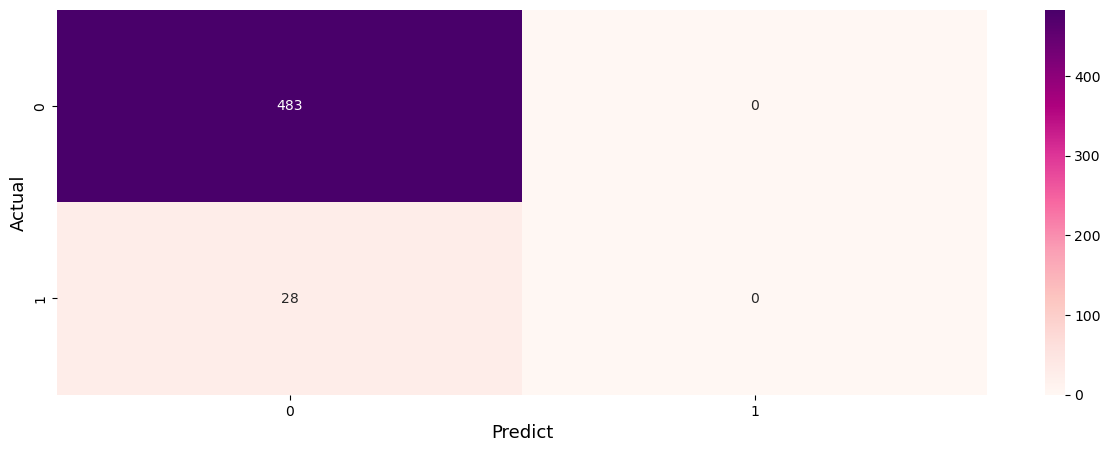

In [98]:
pt.figure(figsize=(15,5))
p=model.predict(x_tst)
c= confusion_matrix(y_tst,p)
sns.heatmap(c,annot=True,fmt="d",cmap="RdPu")
pt.xlabel("Predict",fontsize=13)
pt.ylabel("Actual",fontsize=13)

In [99]:
model2=LogisticRegression(penalty="l2",max_iter=100,C=3)
model2.fit(x_tr,y_tr)

LogisticRegression(C=3)

In [100]:
model2.score(x_tr,y_tr)

0.9519460752337464

In [101]:
model2.score(x_tst,y_tst)

0.9452054794520548

Text(158.22222222222223, 0.5, 'Actual')

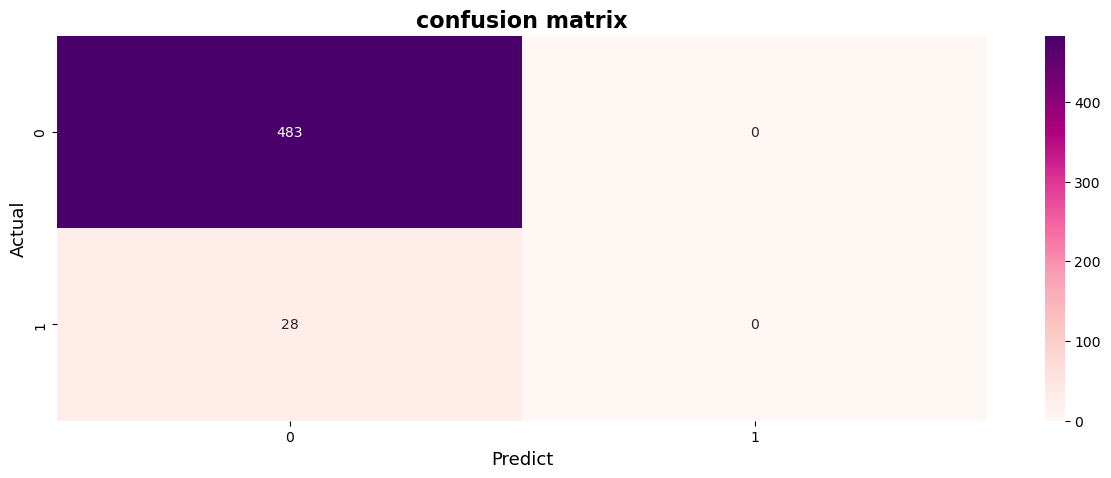

In [102]:
pt.figure(figsize=(15,5))
p=model.predict(x_tst)
c= confusion_matrix(y_tst,p)
sns.heatmap(c,annot=True,fmt="d",cmap="RdPu")
pt.title("confusion matrix",fontsize=16,weight="bold")
pt.xlabel("Predict",fontsize=13)
pt.ylabel("Actual",fontsize=13)

In [117]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=0 )
classifier.fit(x_tr, y_tr)

SVC(kernel='linear', random_state=0)

In [108]:
y_pred = classifier.predict(x_tst)

In [109]:
cm = confusion_matrix(y_tst, y_pred)

Text(158.22222222222223, 0.5, 'Actual')

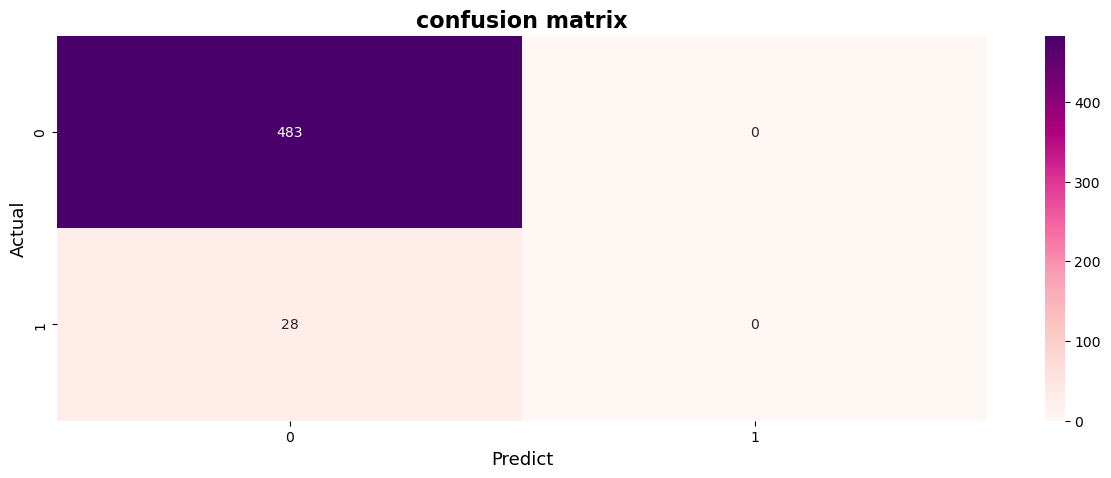

In [114]:
pt.figure(figsize=(15,5))
p=model.predict(x_tst)
c= confusion_matrix(y_tst,p)
sns.heatmap(c,annot=True,fmt="d",cmap="RdPu")
pt.title("confusion matrix",fontsize=16,weight="bold")
pt.xlabel("Predict",fontsize=13)
pt.ylabel("Actual",fontsize=13)

In [115]:
print("Accuracy: ",accuracy_score(y_tst,y_pred))
print("\nClassification Report: \n", classification_report(y_tst,y_pred))

Accuracy:  0.9452054794520548

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       483
           1       0.00      0.00      0.00        28

    accuracy                           0.95       511
   macro avg       0.47      0.50      0.49       511
weighted avg       0.89      0.95      0.92       511



In [120]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_tr, y_tr)

LogisticRegression()

In [122]:
y_pred_lr = lr.predict(x_tst)


In [125]:
accuracy_lr=round(accuracy_score(y_tst, y_pred_lr)*100, 2)
print("accuracy",accuracy_lr,"%")

accuracy 94.52 %


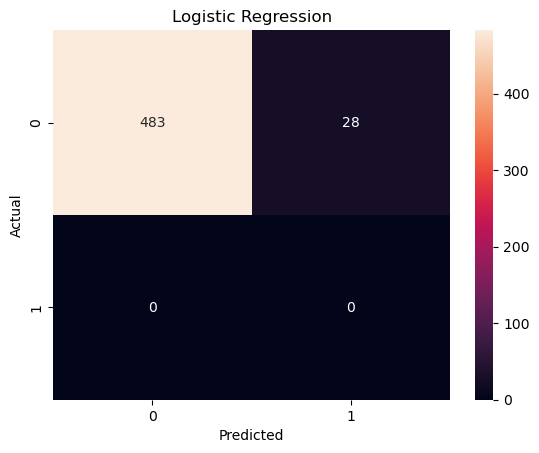

In [130]:
import sklearn.metrics as mt
sns.heatmap(mt.confusion_matrix(y_pred_lr,y_tst),annot = True,fmt = "d")
pt.title("Logistic Regression")
pt.xlabel('Predicted')
pt.ylabel('Actual')
pt.show()